# PyTorch Workflow <br>

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook- `https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb`

* Book version of notebook- `https://www.learnpytorch.io/01_pytorch_workflow/`
* Ask a question - `https://github.com/mrdbourke/pytorch-deep-learning/discussions`

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build ML/DL model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build ML/DL model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.2.1+cu121'

##1. Data (preparation and loading)

Data can be almost anything... in machine learning.<br>
* Excel spreadsheet<br>
* Images of any kind<br>
* videos (YouTube has lots of data...)
* Audio like songs of podcasts
* DNA
* Text<br>

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn pattern in that numerical representation.<br>

To showcase this, let's create some *known* data using the linear regression formula.<br>

We'll use a linear regression formula to make a straight line with *known*  **parameters**

In [3]:
#create *known* parameters

weight = 0.7
bias = 0.3

# Create
start =0
end = 1
step = 0.02
# capital uppecase represents matrix or tensor, where as Lowercase  represent vector.
X =  torch.arange(start, end,step).unsqueeze(dim=1)
y= weight*X + bias

X[:10], y[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [4]:
len(X), len(y)

(50, 50)

##Splitting data into training and test sets (one of the most important concepts in Machine Learning in general)

Let's create training and test set with our data.

In [5]:
#create a train/test split
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, visualize!"

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label= "Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label= "Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label = "Predictions")
  #show the legend
  plt.legend(prop={"size": 14});

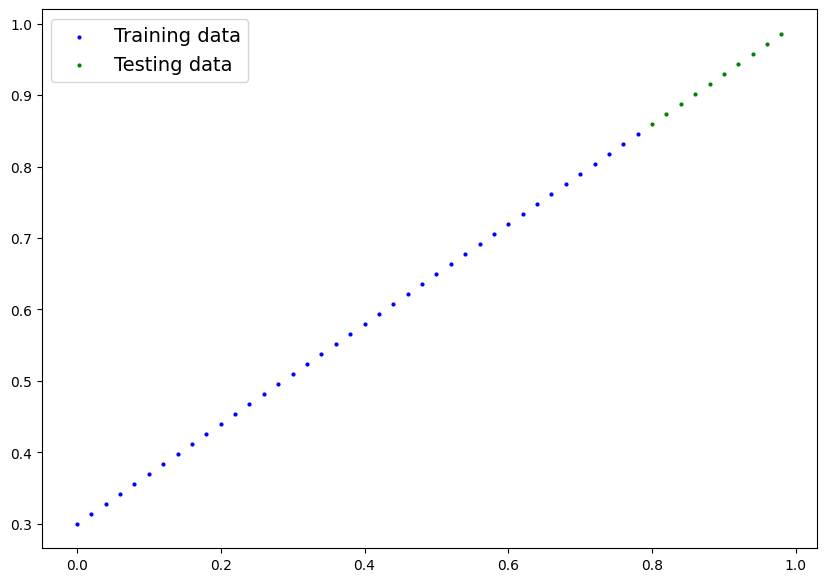

In [7]:
plot_predictions();

#2. Build model

our first PyTorch model!
This is very exciting... let's do it <br>
Because we are going to be building classes throughout the courses, I would recommend getting familiar with OOP in Python, to do so you can use the following resources from Real Python: `https://realpython.com/python3-object-oriented-programming/`<br>

What our model does:
* Start with random values (Weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) <br>

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
# Create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): #<-- almost everything in PyTorch inherits from nn.Module, here LinearRegressionModel is being inheritted from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #<- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, #<- can this parameter be updated via gradient descent?
                                            dtype= torch.float # PyTorch loves the datatype torch.float32
                                            ))
    #we dont necessarily set to--> requires_grad = True
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype= torch.float))

  # forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: #<- "x" is the input data
    return self.weights*x + self.bias # this is the linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the building for computational graphs(a neural networks can be considered a computational graph). Essentially a series of computations executed in apartcular way.

* torch.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.

* torch.nn.Module - The base class for all neural network modules, all the bulding blocks for neural network are subclass. if you are building a neural network in PyTorch your models should subclass nn.Module, requires a forward() method be implemented
* torch.optim - contains various optimization algorithms(these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss)

* torch.utils.data.Dataset -  Represents a map between key(label) and sample(features) pairs of your data.Such as images and their associated labels

* torch.utils.data.Dataloader - Creates a map between key(label) and sample(features) pairs of your data. Such as images and their associated labels.

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

`PyTorch cheat sheet`: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we have created a model, let's see what's inside...

So we can check our model parameters or whats's inside our model using `.parameters()`

In [9]:
#create a manual see
torch.manual_seed(42)

# create an instance of the model(this is subclass of nn.Module)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight,bias

(0.7, 0.3)

###Making prediction using `torch.inference_mode()`

To check out model's prediction power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` meathod.

In [12]:
# make predictions with model
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
#alternatively
# make predictions with model
#what inference mode does it turn off the gradient tracking

with torch.inference_mode():
  y_preds = model_0(X_test)

# you can also do something similar with torch.no_grad
#however, torch.inference_mode() is preferred
#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

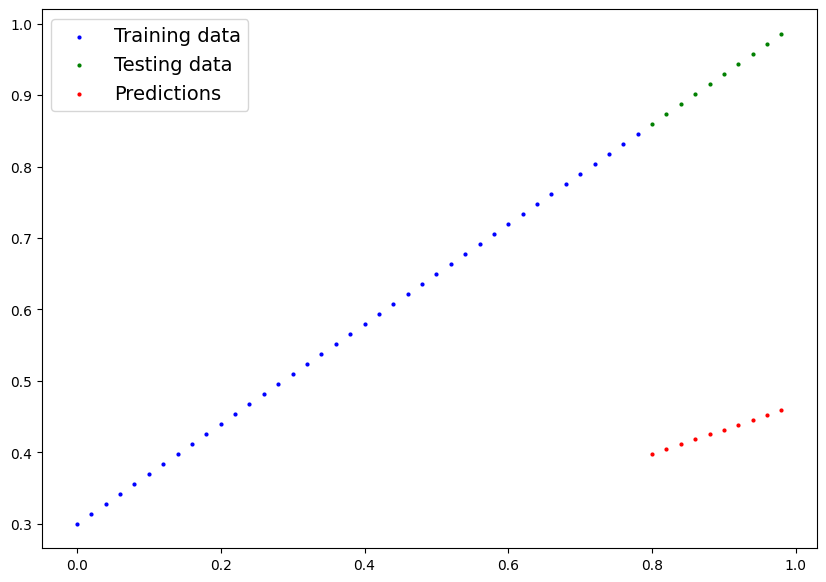

In [15]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters, or in other words from a poor representation of the data to a better representation of the data.


One way to measure how poor or how wrong your models prediction are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's prediction are to the ideal outputs, lower is better.

* **optimizer:** Takes into account the loss of a model and adjusts the model's parameter (e.g. weight & bias) to improve the loss function : https://pytorch.org/docs/stable/optim.html

    *   `params`- the model parameters you would like to optimize, for example `params = model_0.parameters()`
    *   `lr`(learning rate) -  the learning rate is a hyperparmeter that defines how big/small the optimizer changes the parameter with each step(a small `lr` result in small changes, a large `lr` results in large changes)


And specifacally for PyTorch, we need:

* A training loop
* A testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
#Check out our model's parameters(a parameter is avalue that the model sets itself)

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), # we want to optimize the parameter
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparameter you can set



Q: Which loss function and optimizer should I use?
A: This will be a problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.<br>

For example, for a regression problem(like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.<br>

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch.

A couple of things we need in a training loop:
0. Loop through the data.
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad.
4. Loss backward - moves backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)



In [19]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [22]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter becuase we've set it ourselves)
epochs =2000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()


  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ## Testing
  model_0.eval() #turns off different settings in the model not needed for the evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  #with torch.no_grad(): #does similar things like torch.inference_mode() but torch.inference_mode() is faster
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2.Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
import numpy as np
#when we work on GPU
#np.array(torch.tensor(loss_values).cpu().numpy())
#np.array(torch.tensor(test_loss_values).cpu().numpy())

# But when we work on CPU
#np.array(torch.tensor(loss_values).numpy())
#np.array(torch.tensor(test_loss_values).numpy())

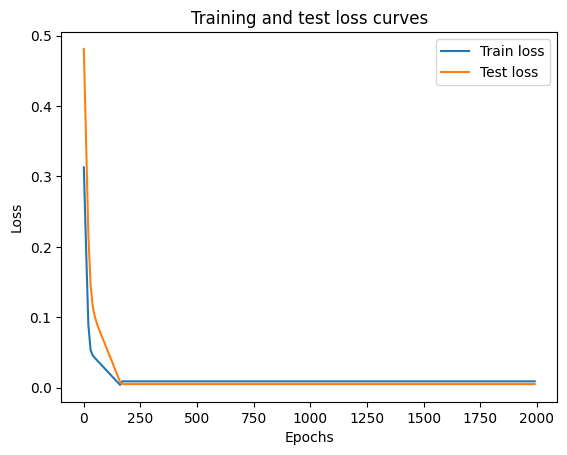

In [25]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [26]:
weight ,bias

(0.7, 0.3)

In [27]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

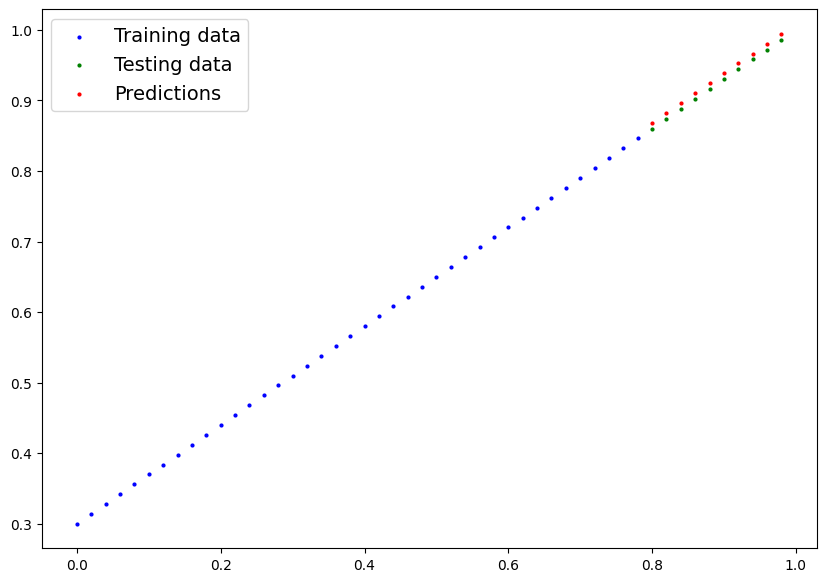

In [28]:
plot_predictions(predictions = y_preds_new)

## 4.Making prdictions with a trained PyTorch model(Inference)



In [29]:
# Make some predictions with our  model

with torch.inference_mode():
 y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## 5. Saving and loading a PyTorch model

There are three main methods you should know about for saving and loading the models in PyTorch.

1. `torch.save()` -  allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` -  allows you to load and saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state disctionary.

PyTorch save & load code tutorial + extra curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html # saving-loading-model-for inference

In [30]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
#A common PyTorch convention is to save models using either a .pt or .pth file extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#MODEL_SAVE_PATH
#3 save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [31]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 22 14:14 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's   `state_dict()` rather the entire model, we will create a new
instance of our model class and load the saved `state_dict()` into that.

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [33]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()
print(f"Parameters of new model: {loaded_model_0.state_dict()}")
# Load the saved state_dict of model_0 (This will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

Parameters of new model: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


<All keys matched successfully>

In [34]:
print(f"Parameters of new model: {loaded_model_0.state_dict()}")

Parameters of new model: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [35]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [36]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6.Putting it all together

Let's go back through the steps above and see it all in one place.

In [37]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

Create device-agnostic code.

This means if we have got a access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU.

In [38]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cpu


In [39]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 6.1 Data

In [40]:
# Create some data using the linear regression formula of y = weight*x + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
X =  torch.arange(start, end,step).unsqueeze(dim=1) # Without unsqueeze, errors will pop up
y= weight*X + bias

X[:10], y[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [41]:
# Splot data
train_split = int(0.8*len(X))

X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

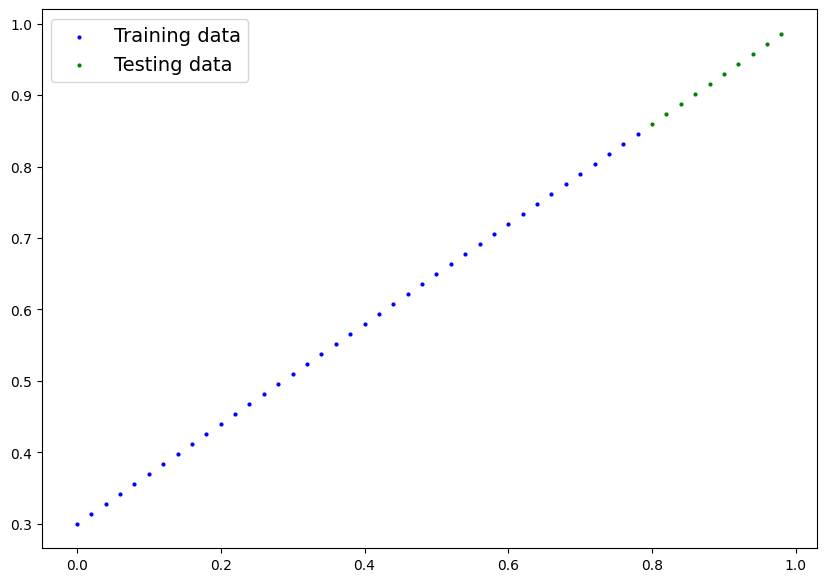

In [42]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train,y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [43]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [44]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [45]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [46]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [47]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training
for training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [48]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimier
optimizer = torch.optim.SGD(params= model_1.parameters(),lr=0.01)



In [49]:
#Let's write a training Loop

torch.manual_seed(42)

epochs =200
#put data on the target device (device agnostic code for the data)
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():

    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch%10==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [51]:
weight, bias

(0.7, 0.3)

## 6.4 Making model into evaluation mode



In [52]:
model_1.eval()

### Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

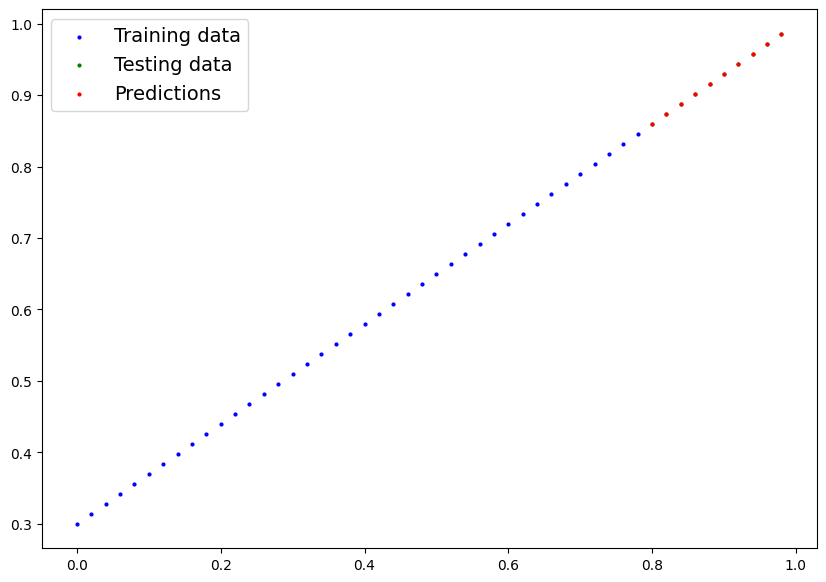

In [53]:
plot_predictions(predictions = y_preds)

## 6.5 Saving & loading a trained model

In [54]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [55]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [56]:
# Load a PyTorch model


# Create a new instance of linear regression
loaded_model_1 = LinearRegressionModelV2()


# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [58]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [59]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])